In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from typing import Union, Tuple

Creating test image...
Test image created: image.jpg
Successfully loaded images - Gray: (256, 256), RGB: (256, 256, 3)

Applying filters to grayscale image...
✓ Applied blur_3x3 to grayscale
✓ Applied sobel_horizontal to grayscale
✓ Applied sobel_vertical to grayscale
✓ Applied laplacian to grayscale
✓ Applied edge_detection to grayscale
✓ Applied sharpen to grayscale
✓ Applied emboss to grayscale
✓ Applied gaussian_blur to grayscale
✓ Applied unsharp_mask to grayscale
✓ Applied box_blur_5x5 to grayscale
✓ Applied box_blur_7x7 to grayscale
✓ Applied prewitt_horizontal to grayscale
✓ Applied prewitt_vertical to grayscale
✓ Applied roberts_x to grayscale
✓ Applied roberts_y to grayscale
✓ Applied random_3x3 to grayscale
✓ Applied random_5x5 to grayscale
✓ Applied random_7x7 to grayscale

Applying filters to RGB image...
✓ Applied blur_3x3 to RGB
✓ Applied sobel_horizontal to RGB
✓ Applied sobel_vertical to RGB
✓ Applied laplacian to RGB
✓ Applied edge_detection to RGB
✓ Applied sharpen t

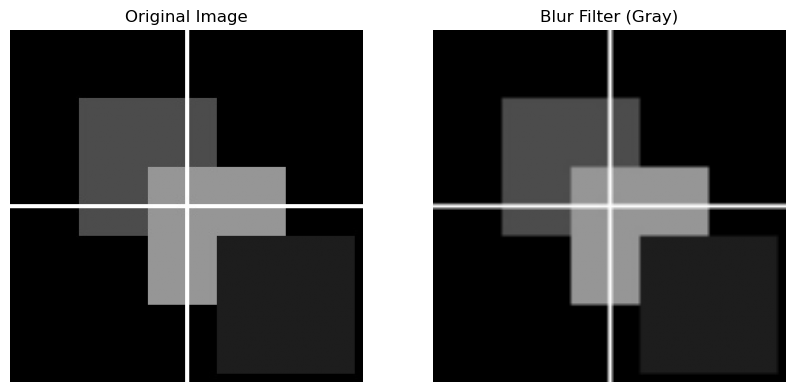

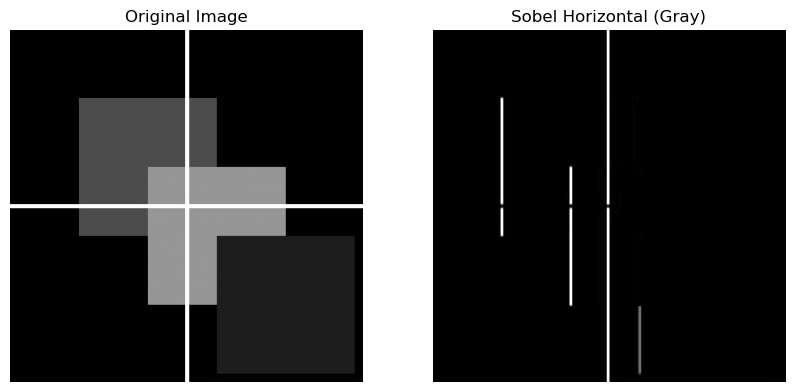

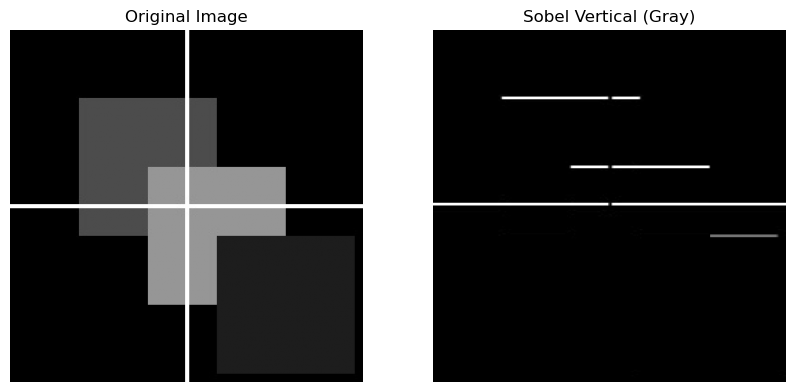

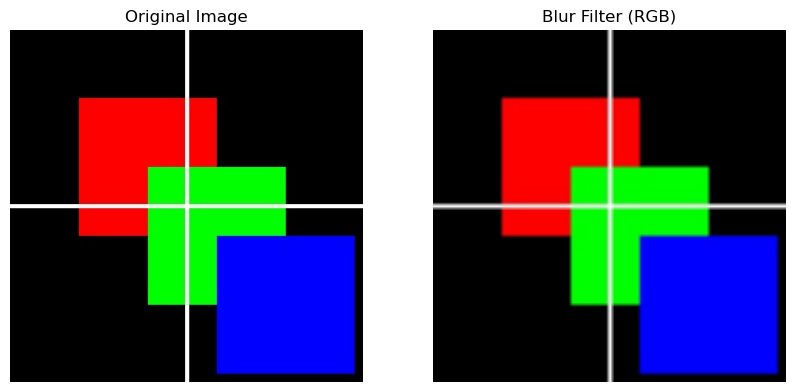

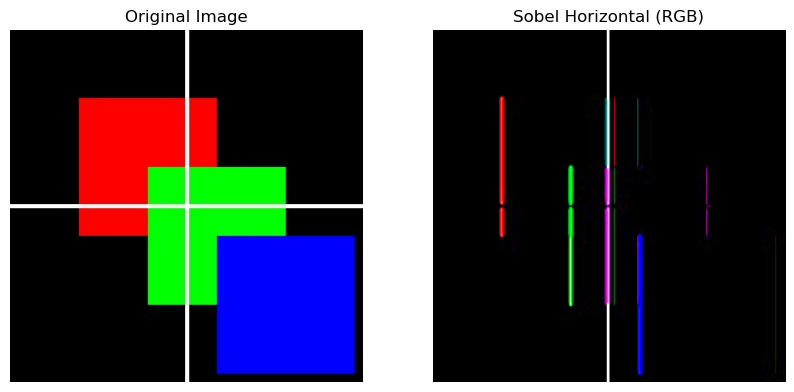

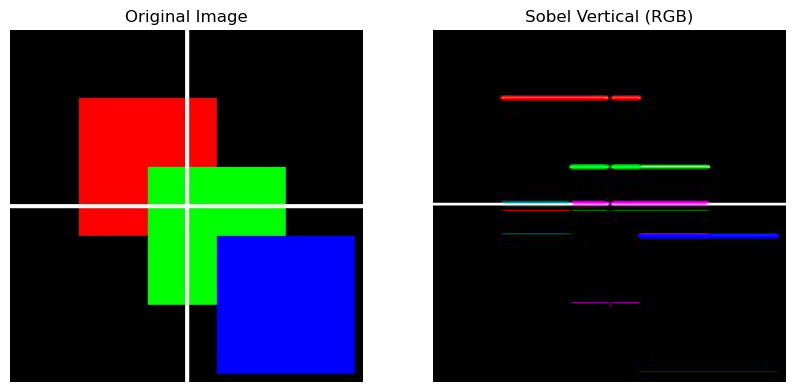


Displaying grid comparisons...


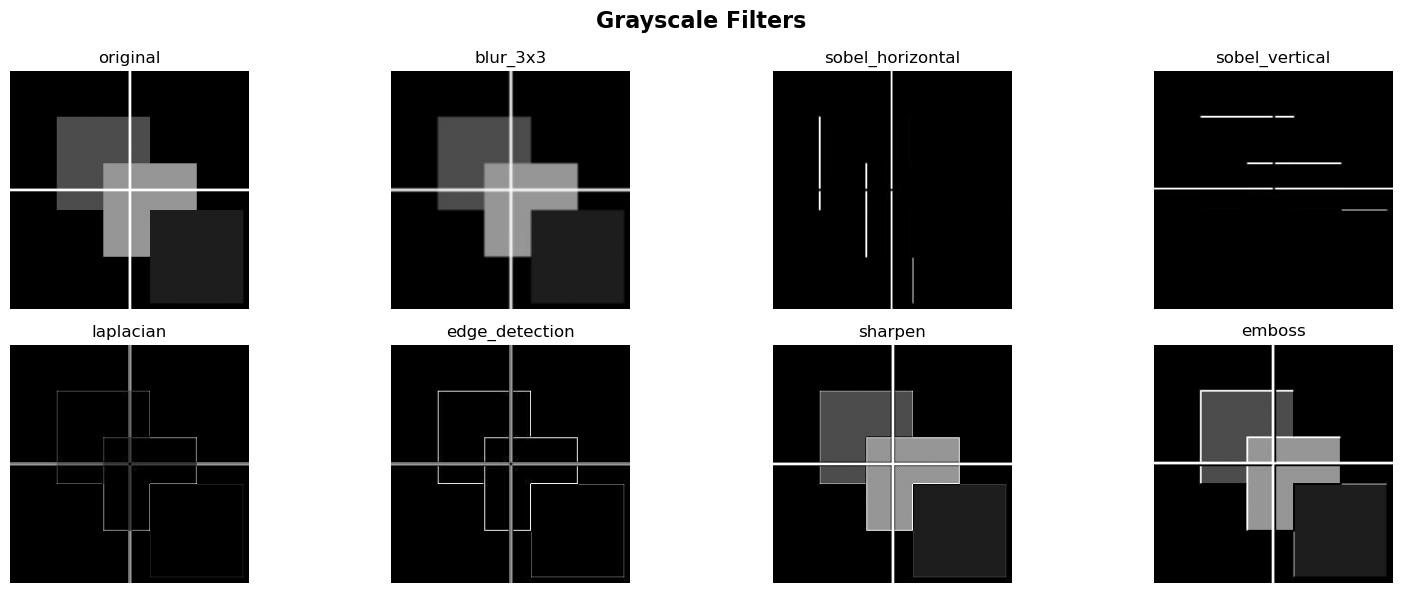

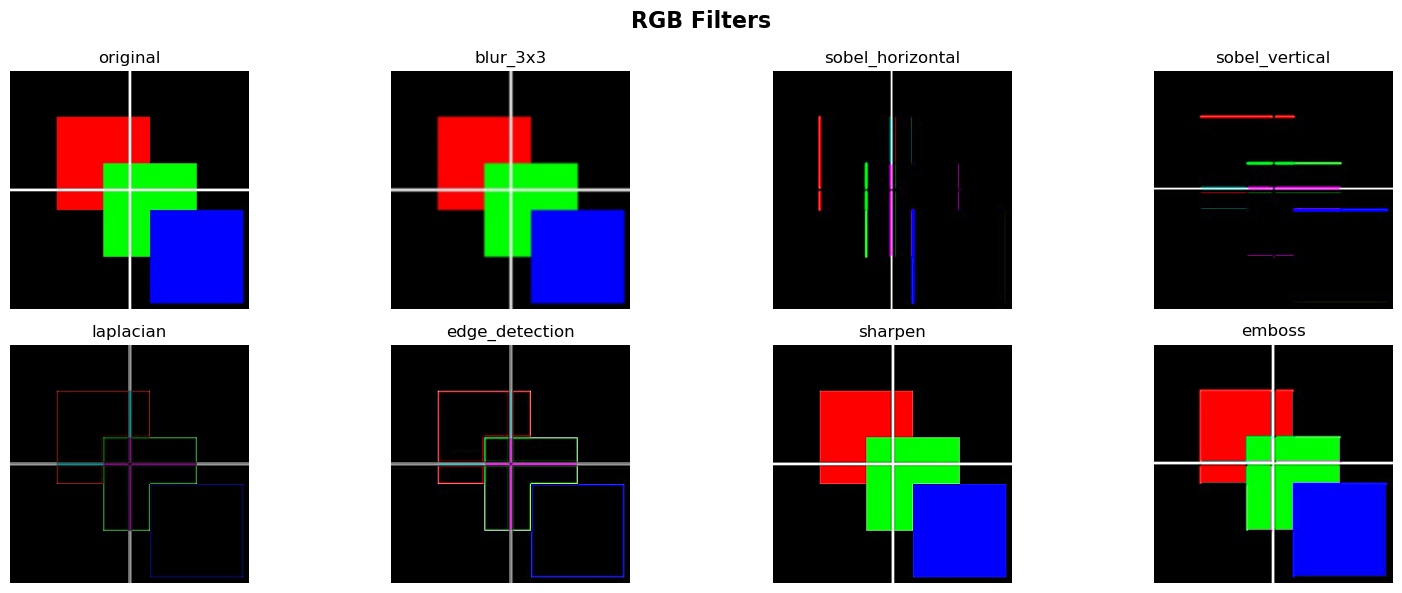

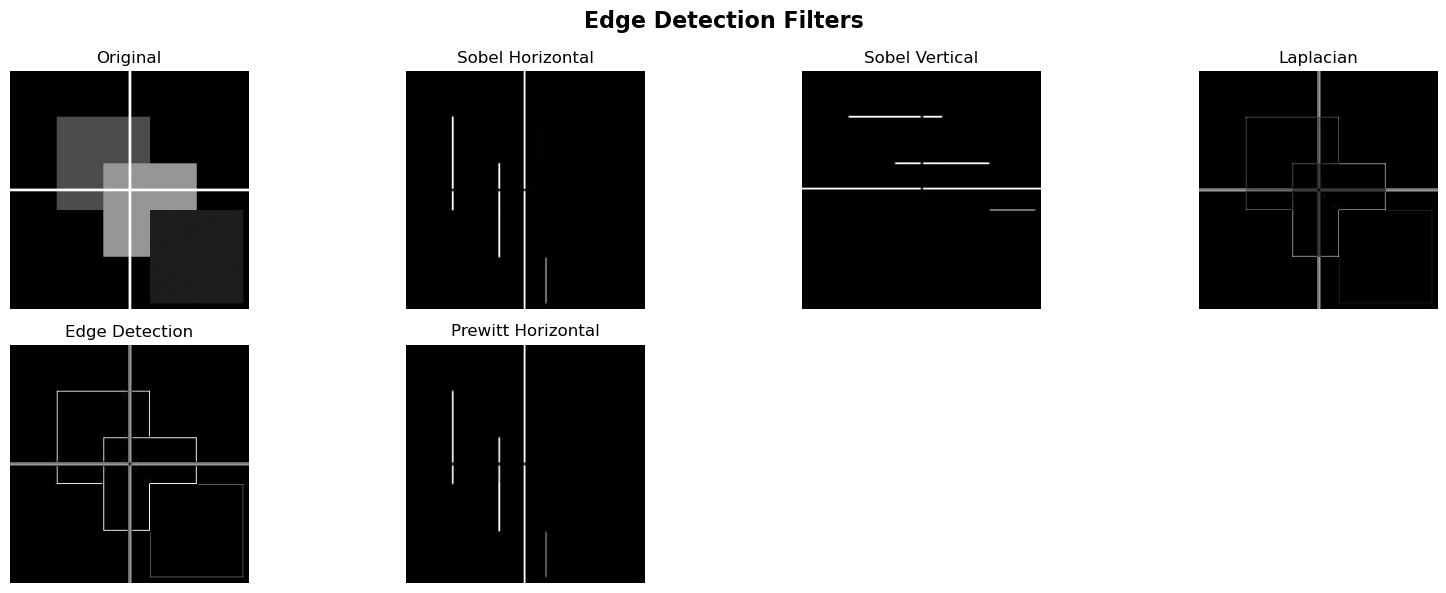

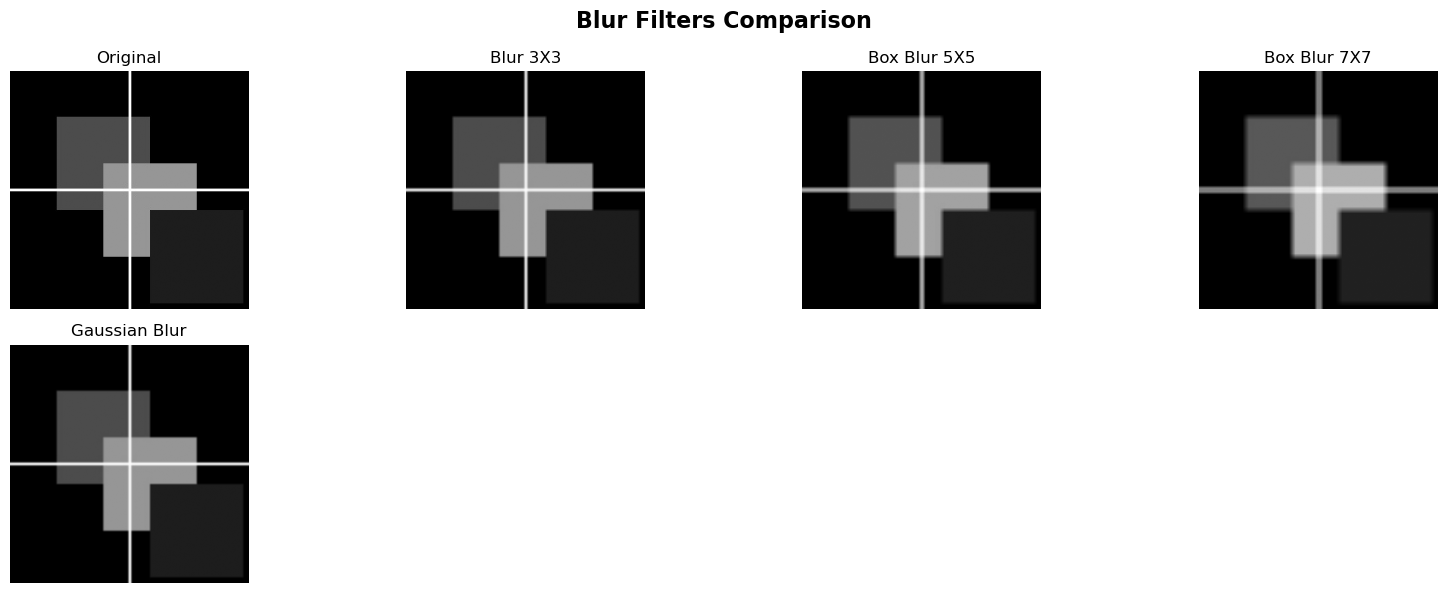


Saving results...
✅ All filters applied and saved successfully!
Check the current directory for saved filtered images.


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def image_load(imagepath, channel):
    """
    Load an image in grayscale or RGB format
    TODO1: Improve this script to automate whether it's a grayscale or RGB image
    TODO2: Add assertions to test whether it's a grayscale or RGB image
    """
    # Check if file exists
    assert os.path.exists(imagepath), f"Error: Image file '{imagepath}' not found"
    
    if channel == 1:  # Grayscale
        image = cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)
        assert image is not None, "Error: Unable to load grayscale image"
        assert len(image.shape) == 2, "Error: Image is not grayscale (should be 2D)"
        return image
    
    elif channel == 3:  # RGB
        image = cv2.imread(imagepath)
        assert image is not None, "Error: Unable to load RGB image"
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        assert len(image.shape) == 3, "Error: Image is not RGB (should be 3D)"
        assert image.shape[2] == 3, "Error: Image doesn't have 3 channels"
        return image
    
    else:  # Auto-detect (TODO1 improvement)
        # Try to load as color first
        color_image = cv2.imread(imagepath)
        gray_image = cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)
        
        # Assertions (TODO2)
        assert color_image is not None or gray_image is not None, "Error: Unable to load image in any format"
        
        if color_image is not None:
            color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
            assert len(color_image.shape) == 3 and color_image.shape[2] == 3, "Error: RGB image format incorrect"
        
        if gray_image is not None:
            assert len(gray_image.shape) == 2, "Error: Grayscale image format incorrect"
        
        return gray_image, color_image

def apply_convolution(image, kernel):
    """
    Apply convolution filter to an image
    TODO: Add necessary assertions for output size based on image and kernel
    """
    # Assertions to validate inputs
    assert isinstance(image, np.ndarray), "Image must be a NumPy array"
    assert isinstance(kernel, np.ndarray), "Kernel must be a NumPy array"
    assert len(kernel.shape) == 2, "Kernel must be a 2D matrix"
    assert kernel.shape[0] == kernel.shape[1], "Kernel must be square"
    assert kernel.shape[0] % 2 == 1, "Kernel must have odd size"
    assert len(image.shape) in [2, 3], "Image must be grayscale (2D) or RGB (3D)"

    if len(image.shape) == 3:  # RGB Image
        assert image.shape[2] == 3, "RGB image must have 3 channels"
        height, width, channels = image.shape
        output = np.zeros_like(image, dtype=np.float32)
        
        # Apply filter on each channel
        for c in range(channels):
            output[:, :, c] = convolve_channel(image[:, :, c], kernel)
        
        # TODO: Assert output size
        assert output.shape == (height, width, channels), "Output size must match input size for RGB"
        
    else:  # Grayscale image
        height, width = image.shape
        output = convolve_channel(image, kernel)
        
        # TODO: Assert output size
        assert output.shape == (height, width), "Output size must match input size for grayscale"

    # Normalize to avoid values outside range [0, 255]
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

def convolve_channel(image, kernel):
    """
    Apply convolution on a single channel
    TODO: Add assertions for output size based on image, kernel, and channel
    """
    # Assertions to validate dimensions
    assert image.shape[0] >= kernel.shape[0], "Image too small for kernel in height"
    assert image.shape[1] >= kernel.shape[1], "Image too small for kernel in width"

    # Image and kernel dimensions
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2

    # TODO: Research np.pad method and modify parameters
    # Using different padding modes for better results
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')
    output = np.zeros_like(image, dtype=np.float32)

    # Apply convolution
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)

    # TODO: Assert output size
    assert output.shape == (img_height, img_width), "Output must have same dimensions as input image"
    
    return output

def display_images(original, filtered, title):
    """
    TODO: Improve script to display original image with different filters in one figure with captions
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray' if len(original.shape) == 2 else None)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(filtered, cmap='gray' if len(filtered.shape) == 2 else None)
    plt.axis('off')

    plt.show()

def display_images_grid(images, titles, main_title="Filter Comparison"):
    """
    TODO improvement: Display multiple images in a single figure with captions
    """
    n_images = len(images)
    cols = min(4, n_images)
    rows = (n_images + cols - 1) // cols
    
    plt.figure(figsize=(4*cols, 3*rows))
    plt.suptitle(main_title, fontsize=16, fontweight='bold')
    
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.title(title)
        plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Define convolution kernels
# TODO: Add other filters (all) including random ones with a seed of your choice

# 1. Blur filter (average)
blur_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

# 2. Sobel horizontal filter
sobel_horizontal = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# 3. Sobel vertical filter
sobel_vertical = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# TODO: Adding all other filters from Wikipedia and random ones
# 4. Laplacian filter
laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

# 5. Edge detection filter
edge_detection = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

# 6. Sharpen filter
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# 7. Emboss filter
emboss_kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

# 8. Gaussian blur (approximation)
gaussian_blur = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

# 9. Unsharp masking
unsharp_mask = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

# 10. Box blur (different sizes)
box_blur_5x5 = np.ones((5, 5)) / 25
box_blur_7x7 = np.ones((7, 7)) / 49

# 11. Prewitt filters
prewitt_horizontal = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

prewitt_vertical = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

# 12. Roberts cross-gradient
roberts_x = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 0]
])

roberts_y = np.array([
    [0, 1, 0],
    [-1, 0, 0],
    [0, 0, 0]
])

# 13. Random filters with seed
np.random.seed(42)  # TODO: Using seed of choice

random_3x3 = np.random.uniform(-1, 1, (3, 3))
random_3x3 = random_3x3 / np.sum(np.abs(random_3x3))

random_5x5 = np.random.uniform(-1, 1, (5, 5))
random_5x5 = random_5x5 / np.sum(np.abs(random_5x5))

random_7x7 = np.random.uniform(-1, 1, (7, 7))
random_7x7 = random_7x7 / np.sum(np.abs(random_7x7))

# Store all kernels in a dictionary for easy access
all_kernels = {
    'blur_3x3': blur_kernel,
    'sobel_horizontal': sobel_horizontal,
    'sobel_vertical': sobel_vertical,
    'laplacian': laplacian_kernel,
    'edge_detection': edge_detection,
    'sharpen': sharpen_kernel,
    'emboss': emboss_kernel,
    'gaussian_blur': gaussian_blur,
    'unsharp_mask': unsharp_mask,
    'box_blur_5x5': box_blur_5x5,
    'box_blur_7x7': box_blur_7x7,
    'prewitt_horizontal': prewitt_horizontal,
    'prewitt_vertical': prewitt_vertical,
    'roberts_x': roberts_x,
    'roberts_y': roberts_y,
    'random_3x3': random_3x3,
    'random_5x5': random_5x5,
    'random_7x7': random_7x7
}

def main():
    """Main function to execute the complete program"""
    
    # Load an image
    image_path = 'image.jpg'  # Make sure you have an image in the same folder
    
    # Create a test image if the file doesn't exist
    if not os.path.exists(image_path):
        print("Creating test image...")
        test_image = np.zeros((256, 256, 3), dtype=np.uint8)
        # Create a pattern for testing
        test_image[50:150, 50:150] = [255, 0, 0]  # Red square
        test_image[100:200, 100:200] = [0, 255, 0]  # Green square  
        test_image[150:250, 150:250] = [0, 0, 255]  # Blue square
        # Add some lines
        cv2.line(test_image, (0, 128), (255, 128), (255, 255, 255), 2)
        cv2.line(test_image, (128, 0), (128, 255), (255, 255, 255), 2)
        cv2.imwrite(image_path, cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR))
        print(f"Test image created: {image_path}")

    # Load images using improved function (TODO1 & TODO2 completed)
    try:
        gray_image, rgb_image = image_load(image_path, 0)  # Auto-detect mode
        print(f"Successfully loaded images - Gray: {gray_image.shape}, RGB: {rgb_image.shape}")
    except:
        # Fallback to manual loading
        gray_image = image_load(image_path, 1)
        rgb_image = image_load(image_path, 3)
        print(f"Loaded images manually - Gray: {gray_image.shape}, RGB: {rgb_image.shape}")

    # Apply filters on grayscale image
    print("\nApplying filters to grayscale image...")
    gray_results = {'original': gray_image}
    
    for filter_name, kernel in all_kernels.items():
        try:
            filtered_gray = apply_convolution(gray_image, kernel)
            gray_results[filter_name] = filtered_gray
            print(f"✓ Applied {filter_name} to grayscale")
        except Exception as e:
            print(f"✗ Error applying {filter_name} to grayscale: {e}")

    # Apply filters on RGB image  
    print("\nApplying filters to RGB image...")
    rgb_results = {'original': rgb_image}
    
    for filter_name, kernel in all_kernels.items():
        try:
            filtered_rgb = apply_convolution(rgb_image, kernel)
            rgb_results[filter_name] = filtered_rgb
            print(f"✓ Applied {filter_name} to RGB")
        except Exception as e:
            print(f"✗ Error applying {filter_name} to RGB: {e}")

    # Display results using original method
    print("\nDisplaying individual comparisons...")
    display_images(gray_image, gray_results['blur_3x3'], "Blur Filter (Gray)")
    display_images(gray_image, gray_results['sobel_horizontal'], "Sobel Horizontal (Gray)")
    display_images(gray_image, gray_results['sobel_vertical'], "Sobel Vertical (Gray)")
    display_images(rgb_image, rgb_results['blur_3x3'], "Blur Filter (RGB)")
    display_images(rgb_image, rgb_results['sobel_horizontal'], "Sobel Horizontal (RGB)")
    display_images(rgb_image, rgb_results['sobel_vertical'], "Sobel Vertical (RGB)")

    # TODO improvement: Display multiple filters in grid
    print("\nDisplaying grid comparisons...")
    
    # Show first 8 grayscale filters
    gray_images = list(gray_results.values())[:8]
    gray_titles = list(gray_results.keys())[:8]
    display_images_grid(gray_images, gray_titles, "Grayscale Filters")
    
    # Show first 8 RGB filters  
    rgb_images = list(rgb_results.values())[:8]
    rgb_titles = list(rgb_results.keys())[:8]
    display_images_grid(rgb_images, rgb_titles, "RGB Filters")
    
    # Show edge detection filters
    edge_filters = ['original', 'sobel_horizontal', 'sobel_vertical', 'laplacian', 'edge_detection', 'prewitt_horizontal']
    edge_images = [gray_results[f] for f in edge_filters if f in gray_results]
    edge_titles = [f.replace('_', ' ').title() for f in edge_filters if f in gray_results]
    display_images_grid(edge_images, edge_titles, "Edge Detection Filters")
    
    # Show blur filters comparison
    blur_filters = ['original', 'blur_3x3', 'box_blur_5x5', 'box_blur_7x7', 'gaussian_blur']
    blur_images = [gray_results[f] for f in blur_filters if f in gray_results]
    blur_titles = [f.replace('_', ' ').title() for f in blur_filters if f in gray_results]
    display_images_grid(blur_images, blur_titles, "Blur Filters Comparison")

    # Save results
    print("\nSaving results...")
    
    # TODO: Complete for all filters
    for filter_name, filtered_image in gray_results.items():
        if filter_name != 'original':
            cv2.imwrite(f'gray_{filter_name}.jpg', filtered_image)
    
    for filter_name, filtered_image in rgb_results.items():
        if filter_name != 'original':
            # Convert RGB back to BGR for saving
            bgr_image = cv2.cvtColor(filtered_image, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'rgb_{filter_name}.jpg', bgr_image)
    
    print("✅ All filters applied and saved successfully!")
    print("Check the current directory for saved filtered images.")

if __name__ == "__main__":
    main()